In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_venn as venn

In [ ]:
# read in data for enslaved people tab
enslaved_tab = pd.read_csv('Census Charlestown 1775 05-14-24 - Enslaved people.csv')

# clean up formatting
enslaved_tab.columns = ['Year of Record', 'Total People Enslaved in Record', '# Male', '# Female', '# Black',
                        '# Native', 'Name and/or Description', 'Enslaver Last Name', 'Enslaver First Name',
                        'Town', 'Unique ID']
enslaved_tab = enslaved_tab.drop([0])

# convert some columns from nan to 0
enslaved_tab['# Male'] = enslaved_tab['# Male'].fillna(0)
enslaved_tab['# Female'] = enslaved_tab['# Female'].fillna(0)
enslaved_tab['# Native'] = enslaved_tab['# Native'].fillna(0)

# convert datatypes
enslaved_tab['Year of Record'] = enslaved_tab['Year of Record'].astype(int)
enslaved_tab['Total People Enslaved in Record'] = enslaved_tab['Total People Enslaved in Record'].astype(int)
enslaved_tab['# Male'] = enslaved_tab['# Male'].astype(int)
enslaved_tab['# Female'] = enslaved_tab['# Female'].astype(int)
enslaved_tab['# Black'] = enslaved_tab['# Black'].astype(int)
enslaved_tab['# Native'] = enslaved_tab['# Native'].astype(int)

enslaved_tab

,Year of Record,Total People Enslaved in Record,# Male,# Female,# Black,# Native,Name and/or Description,Enslaver Last Name,Enslaver First Name,Town,Unique ID
1,1741,1,0,1,1,0,Coelia,Alford,Captain,Charlestown,ID_1
2,1751,1,0,1,1,0,Phillis,Alford,John,Charlestown,ID_2
3,1756,1,1,0,1,0,Cerado,"Alford, Esqr.",John,Charlestown,ID_3
4,1753,1,0,1,1,0,Rose,Angier,R,Charlestown,ID_4
5,1749,1,0,1,1,0,Belinda,Austin,John,Charlestown,ID_5
...,...,...,...,...,...,...,...,...,...,...,...
158,1730,1,0,1,1,0,Pippwe,NaN,NaN,Charlestown,ID_158
159,1760,1,1,0,1,0,Pomp Miller,NaN,NaN,Charlestown,ID_159
160,1753,1,1,0,1,0,Prince Green,NaN,NaN,Charlestown,ID_160
161,1706,1,1,0,1,0,Robert Comings,NaN,NaN,Charlestown,ID_161


Text(8.65, 25, '*28 enslaved people did not \nhave an enslaver listed.')

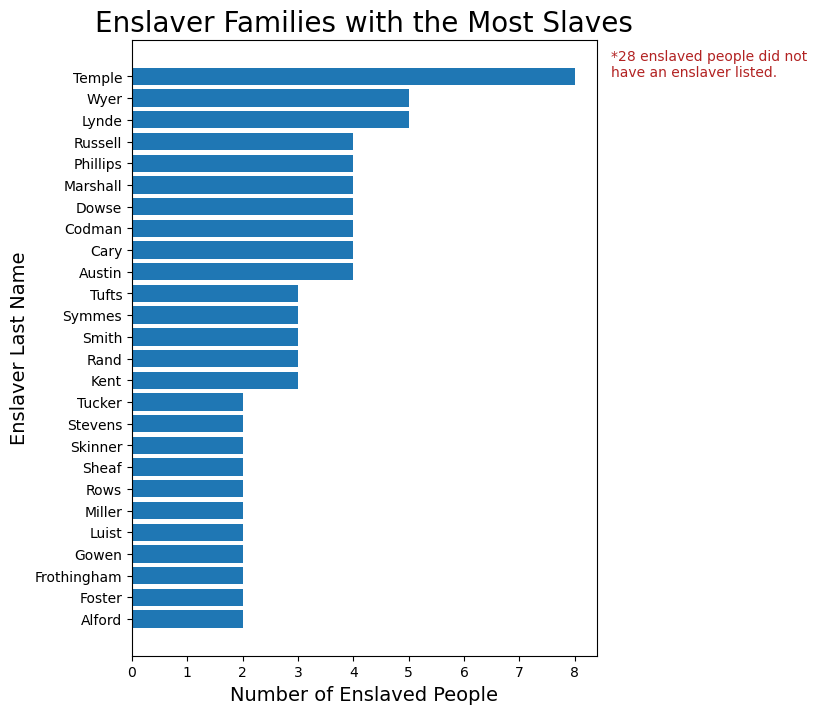

In [ ]:
# get number of enslaved people by enslaver family
enslaver_names_dict = {}
for i in range(len(enslaved_tab['Enslaver Last Name'])):
    if enslaved_tab['Enslaver Last Name'].iloc[i] in enslaver_names_dict.keys():
        enslaver_names_dict[enslaved_tab['Enslaver Last Name'].iloc[i]] += 1
    else:
        enslaver_names_dict[enslaved_tab['Enslaver Last Name'].iloc[i]] = 1

# make list of enslaver families that enslaved more than one person
enslaver_names_lst = []
for key, value in enslaver_names_dict.items():
    if value > 1:
        enslaver_names_lst.append((key, value))

# sort the list from greatest to least
enslaver_names_lst.sort(key=lambda tup: tup[1])

# make separate lists for x and y
enslaver_names_x = []
enslaver_names_y = []
for name in enslaver_names_lst:

    # skip nan values
    if enslaver_names_lst.index(name) == 26:
        pass

    else:
        enslaver_names_x.append(name[0])
        enslaver_names_y.append(name[1])

# plot the data
plt.figure(figsize=(6, 8))
plt.barh(enslaver_names_x, enslaver_names_y)
plt.title('Enslaver Families with the Most Slaves', fontsize=20)
plt.xlabel('Number of Enslaved People', fontsize=14)
plt.ylabel('Enslaver Last Name', fontsize=14)
plt.text(8.65, 25, '*28 enslaved people did not \nhave an enslaver listed.', color='firebrick')

In [ ]:
import altair as alt


In [ ]:
# filter data for just families with more than one slave
multi_slaves_lst = []

for i in range(len(enslaved_tab['Enslaver Last Name'])):
    if enslaved_tab['Enslaver Last Name'].iloc[i] in enslaver_names_x:
        multi_slaves_lst.append(enslaved_tab.iloc[i])

multi_slaves = pd.DataFrame(multi_slaves_lst, columns=['Year of Record', 'Total People Enslaved in Record', '# Male', '# Female', '# Black',
                        '# Native', 'Name and/or Description', 'Enslaver Last Name', 'Enslaver First Name',
                        'Town', 'Unique ID'])

In [ ]:
def gender(person):
    if person['# Female'] > 0:
        return 'Female'
    else:
        return 'Male'

# Add a new column indicating if the person is male or female
multi_slaves['Gender'] = multi_slaves.apply(gender, axis=1)

In [ ]:
multi_slaves.head()

,Year of Record,Total People Enslaved in Record,# Male,# Female,# Black,# Native,Name and/or Description,Enslaver Last Name,Enslaver First Name,Town,Unique ID,Gender
1,1741,1,0,1,1,0,Coelia,Alford,Captain,Charlestown,ID_1,Female
2,1751,1,0,1,1,0,Phillis,Alford,John,Charlestown,ID_2,Female
5,1749,1,0,1,1,0,Belinda,Austin,John,Charlestown,ID_5,Female
6,1721,1,1,0,1,0,Cezar,Austin,Ebenr.,Charlestown,ID_6,Male
7,1751,1,0,1,1,0,Grace,Austin,Ebenezer,Charlestown,ID_7,Female


In [ ]:
# base chart to build on top of
base = (
    alt.Chart(data=multi_slaves)
    .transform_aggregate(count_="count()", groupby=["Enslaver Last Name", "Enslaver First Name"])
    .transform_stack(
        stack="count_",
        as_=["stack_count_Enslaver_Last_Name1", "stack_count_Enslaver_Last_Name2"],
        offset="normalize",
        sort=[alt.SortField("Enslaver Last Name", "ascending")],
        groupby=[],
    )
    .transform_window(
        x="min(stack_count_Enslaver_Last_Name1)",
        x2="max(stack_count_Enslaver_Last_Name2)",
        rank_First="dense_rank()",
        distinct_First="distinct(Enslaver First Name)",
        groupby=["Enslaver Last Name"],
        frame=[None, None],
        sort=[alt.SortField("Enslaver First Name", "ascending")],
    )
    .transform_window(
        rank_Last="dense_rank()",
        frame=[None, None],
        sort=[alt.SortField("Enslaver Last Name", "ascending")],
    )
    .transform_stack(
        stack="count_",
        groupby=["Enslaver Last Name"],
        as_=["y", "y2"],
        offset="normalize",
        sort=[alt.SortField("Enslaver First Name", "ascending")],
    )
    .transform_calculate(
        ny="datum.y + (datum.rank_First - 1) * datum.distinct_First * 0.01 / 3",
        ny2="datum.y2 + (datum.rank_First - 1) * datum.distinct_First * 0.01 / 3",
        nx="datum.x + (datum.rank_Last - 1) * 0.01",
        nx2="datum.x2 + (datum.rank_Last - 1) * 0.01",
        xc="(datum.nx+datum.nx2)/2",
        yc="(datum.ny+datum.ny2)/2",
    ).properties(
        height=300,
        width=2000
    )
)

# get geometry for rectangles
rect = base.mark_rect().encode(
    x=alt.X("nx:Q").axis(None),
    x2="nx2",
    y=alt.Y("ny:Q").axis(None),
    y2="ny2",
    color=alt.Color("Enslaver Last Name:N").legend(None),
    opacity=alt.Opacity("Enslaver First Name:N").legend(None),
    tooltip=["Enslaver Last Name:N", "Enslaver First Name:N"],
)

# add labels to rectangles
text = base.mark_text(baseline="middle").encode(
    alt.X("xc:Q").axis(None),
    alt.Y("yc:Q").title("Enslaver First Name"),
    text="Enslaver First Name:N"
)

# combine to create mosaic
mosaic = rect + text

# add enslaver name labels
origin_labels = base.mark_text(baseline="middle", align="center").encode(
    alt.X("min(xc):Q").title("Enslaver Last Name").axis(orient="top", labelColor='white'),
    alt.Color("Enslaver Last Name").legend(None),
    text="Enslaver Last Name",
).properties(height=10, width=2000, title='Enslaver Families in 1775 Charlestown')

# combine chart together
mosaic_w_labels = (
    (origin_labels & mosaic)
    .resolve_scale(x="shared")
    .configure_view(stroke="")
    .configure_concat(spacing=1)
    .configure_axis(domain=False, ticks=False, labels=True, grid=False)
)

# create brush to link to other chart
brush = alt.selection_interval(empty=True)
mosaic_w_labels = mosaic_w_labels.add_params(brush)

# make gender chart connected by brush
family_bar = alt.Chart(data=multi_slaves, title='Gender of Enslaved People').transform_aggregate(count_="count()",
                                                              groupby=["Enslaver Last Name",
                                                                       "Enslaver First Name",
                                                                       "Name and/or Description",
                                                                      "Gender"]).transform_stack(
        stack="count_",
        as_=["stack_count_Enslaver_Last_Name1", "stack_count_Enslaver_Last_Name2"],
        offset="normalize",
        sort=[alt.SortField("Enslaver Last Name", "ascending")],
        groupby=[],
    ).transform_window(
        x="min(stack_count_Enslaver_Last_Name1)",
        x2="max(stack_count_Enslaver_Last_Name2)",
        rank_First="dense_rank()",
        distinct_First="distinct(Enslaver First Name)",
        groupby=["Enslaver Last Name"],
        frame=[None, None],
        sort=[alt.SortField("Enslaver First Name", "ascending")],
    ).transform_window(
        rank_Last="dense_rank()",
        frame=[None, None],
        sort=[alt.SortField("Enslaver Last Name", "ascending")],
    ).transform_stack(
        stack="count_",
        groupby=["Enslaver Last Name"],
        as_=["y", "y2"],
        offset="normalize",
        sort=[alt.SortField("Enslaver First Name", "ascending")],
    ).transform_calculate(
        ny="datum.y + (datum.rank_First - 1) * datum.distinct_First * 0.01 / 3",
        ny2="datum.y2 + (datum.rank_First - 1) * datum.distinct_First * 0.01 / 3",
        nx="datum.x + (datum.rank_Last - 1) * 0.01",
        nx2="datum.x2 + (datum.rank_Last - 1) * 0.01",
        xc="(datum.nx+datum.nx2)/2",
        yc="(datum.ny+datum.ny2)/2",
    ).mark_bar().encode(
    x=alt.X('Gender:N', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Name and/or Description:N', title='Name and/or Description'),
    color='Enslaver Last Name:N',
    tooltip=['Enslaver First Name', 'Enslaver Last Name']
).transform_filter(brush).properties(
        height=550,
        width=300
)

interactive_enslavers = ((mosaic_w_labels & family_bar).configure_concat(spacing=50).configure_axis(domain=False, ticks=False, labels=True, grid=False))
interactive_enslavers

alt.VConcatChart(...)

In [ ]:
import geopandas as gpd

# read in data
df_nb = gpd.read_file("1775Charlestown.geojson")

# from "Group 5 Census Charlestown 1775 05-14-24"
overlap = pd.read_csv('overlap.csv')

# clean data
df_overlap = overlap.drop(columns=["which tab"])
df_overlap.rename(columns={"Name": "Name of Enslaved Person"}, inplace=True)
df_overlap['Enslaver Name'] = df_overlap['Enslaver First Name'] + ' ' + df_overlap['Enslaver Last Name']
df_overlap['Sex'] = df_overlap['Sex'].replace({'?': 'Unknown'}).fillna('Unknown')
df_overlap['Sex'] = df_overlap['Sex'].replace({'M': 'Male'})
df_overlap['Sex'] = df_overlap['Sex'].replace({'F': 'Female'})

# count number of enslaved people and gender per family and make a new df for these counts
family_counts = df_overlap['Family'].value_counts().reset_index()
family_counts.columns = ['F1775_Clai', 'Count']
family_info = df_overlap[['Family', 'Enslaver Name']].drop_duplicates()
family_info = pd.merge(family_info, family_counts, left_on='Family', right_on='F1775_Clai', how='left')

gender_counts = df_overlap.groupby(['Family', 'Sex']).size().unstack(fill_value=0).reset_index()
gender_counts.columns = ['Family', 'Female', 'Male', 'Unknown']
family_info = pd.merge(family_info, gender_counts, on='Family', how='left')

family_info = family_info.dropna()
family_info['Count'] = family_info['Count'].astype(int)
family_info['Female'] = family_info['Female'].astype(int)
family_info['Male'] = family_info['Male'].astype(int)
family_info['Unknown'] = family_info['Unknown'].astype(int)

family_info.rename(columns={"Count": "Enslaved People Count"}, inplace=True)

# blank map of charlestown
res_map = alt.Chart(df_nb).mark_geoshape(
    fill = "#f5f5f5",
    stroke='#ccc'
).project(
    type='identity',
    reflectY=True
).properties(
    width=800,
    height=600
)

# color layer with color scale based on how many enslaved people

click = alt.selection_point(fields=['F1775_Clai'])

layer = alt.Chart(df_nb).mark_geoshape(
    stroke='black'
).encode(
    tooltip=[alt.Tooltip("Enslaved People Count:Q", title="Enslaved People"),
             alt.Tooltip("Enslaver Name:N", title="Enslaver Name"),
             alt.Tooltip("F1775_Clai:N", title="Family ID (1775)")],
    color=alt.condition(click,
        alt.Color("Enslaved People Count:Q", scale=alt.Scale(scheme='reds', reverse=True)),
        alt.value('lightgrey')),
    opacity=alt.condition(click, alt.value(1), alt.value(0.4)),
).transform_lookup(
    lookup='F1775_Clai',
    from_=alt.LookupData(family_info, 'F1775_Clai', ['F1775_Clai', 'Enslaved People Count', 'Enslaver Name' ])
).add_params(click
).project(
    type='identity',
    reflectY=True
).properties(
    width=800,
    height=600
)

gender_bars = alt.Chart(family_info).mark_bar().encode(
    y=alt.Y("Sex:N", title='Gender'),
    x=alt.X("Enslaved People Count:Q", title='Number of Enslaved People'),
    color=alt.Color("Sex:N", scale=alt.Scale(domain=['Female', 'Male', 'Unknown'], range=['pink', 'lightskyblue', 'darkseagreen']), legend=None),
    tooltip=[alt.Tooltip("Enslaved People Count:Q")]
).transform_filter(click
).transform_aggregate(
    Female='sum(Female)',
    Male='sum(Male)',
    Unknown='sum(Unknown)',
    groupby=[]
).transform_fold(['Female', 'Male', 'Unknown'], as_=['Sex', 'Enslaved People Count']
).properties(
    width=400,
    height=100
)

# note
note = alt.Chart(pd.DataFrame({'text': [
    'Note: This visualization is based solely on the data \n'
    'provided, where the slaveholder was identifiable and \n'
    'their household IDs matched the provided mapping data.']})
).mark_text(
    align="left",
    font='Helvetica',
    fontSize=12,
    color='grey',
    lineBreak='\n'
).encode(text='text'
)

layered_maps = res_map + layer
gender_and_note = gender_bars | note

final = (layered_maps & gender_and_note).properties(title='Geographic Distribution and Gender Demographics of Enslaved People in Charlestown'
).configure_title(
    fontSize=18,
    font='Helvetica',
    anchor='middle')

final

alt.VConcatChart(...)